# Hopf Insulator

**References**

* Moore et. al. 2008, Topological Surface States in Three-Dimensional Magnetic Insulators
* Deng et. al., 2013 Hopf insulators and their topologically protected surface states
* Liu et. al., 2017 Symmetry Protected Topological Hopf Insulator and its Generalizations
* Hu et. al. 2019, Quench Dynamics of Hopf Insulators
* Alexandradinata et. al., 2020, Teleportation of Berry curvature on the surface of a Hopf insulator

The cut pieces from different papers, Moore, 2008 (top left);  Deng, 2013 (bottom left), Alexandradinata, 2020 (top right) and Hu, 2019 (bottom right)
<table>
<tr>
    <td> 
        <img src="./figs/Hoph_ham_Moore.png" alt="Drawing" style="width: 480px;"/>
        <img src="./figs/Hoph_ham_Deng.png"  alt="Drawing" style="width: 480px;"/>
    </td>
    <td>
        <img src="./figs/Hoph_ham_Alex.png"  alt="Drawing" style="width: 400px;"/>
        <img src="./figs/Hoph_ham_Hu.png"   alt="Drawing" style="width: 400px;"/>
    </td>
</tr>
</table>

-------

### Few Notes about the papers

**Deng et. al (2013)** has more field theoretical aspect in the Hamiltonian. They also mention that **Moore's 2008** Hamiltonian is a special case of theirs. Little simpler is the explanation in **Hu et. al 2019**

And Here is some excerpt from Deng's paper 2013:

<font color=blue> Most 3D topological insulators have to be protected by some other symmetries,[10],[11] such as time-reversal, particlehole, or chrial symmetry, and the U(1) charge conservation symmetry[12] A peculiar exception occurs when the Hamiltonian has just two effective bands. In this case, interesting topological phases, the so-called Hopf insulators,[13] may exist.  These Hopf insulator phases have no symmetry other than the prerequisite U(1) charge conservation. </font>



In [41]:
import numpy as np
import pylab as plt 
from local_pythtb_NC import tb_model
#from pythtb import tb_model
#from pythtb import wf_array

two_pi=2*np.pi
cList=['darkred','darkgreen','maroon', 'darkblue']

def Hopf_model0(t, soc):
    lat = [ [1., 0., 0.], [0., 1., 0.], [0., 0., 1.]  ]
    orb = [ [0., 0., 0.] ]
    dimk=3; dimr=3
    mymodel=tb_model(dimk, dimr, lat, orb, nspin=2)
    #sigma_z=np.array([[1,0],[0,-1]])
    sx = np.array([0, 1, 0, 0] )
    sy = np.array([0, 0, 1, 0])
    sz = np.array([0, 0, 0, 1])
    
    E_onsite=-13./4.
    mymodel.set_onsite([E_onsite])
    
    mymodel.set_hop( t, 0, 0, [ 1, 0, 0])
    mymodel.set_hop( t, 0, 0, [ 0, 1, 0])
    mymodel.set_hop( t, 0, 0, [ 0, 0, 1])
    
    dir_list= [ [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [0,1,1,1] ]
    R_list =  [ [1,0,0], [0,1,0], [0,0,1], [1,1,1]   ]
    
    Rx = np.array([1,0,0])
    Ry = np.array([0,1,0])
    Rz = np.array([0,0,1])
    
    R_list = [ Rx, Ry, Rz, Rx+Ry+Rz  ]
    dir_list = [sz, sz, sz, sz ]
    
    for i in range(4):
        R = R_list[i]
        hop = -1j*soc*dir_list[i]
        mymodel.set_hop( hop, 0, 0, R , mode='add') 
    
    return mymodel

[0.         0.07856742 0.15713484 0.23570226 0.31426968 0.3928371
 0.47140452 0.54997194 0.62853936 0.70710678] 
 [[0.         0.         0.        ]
 [0.05555556 0.05555556 0.        ]
 [0.11111111 0.11111111 0.        ]
 [0.16666667 0.16666667 0.        ]
 [0.22222222 0.22222222 0.        ]
 [0.27777778 0.27777778 0.        ]
 [0.33333333 0.33333333 0.        ]
 [0.38888889 0.38888889 0.        ]
 [0.44444444 0.44444444 0.        ]
 [0.5        0.5        0.        ]]
SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[2.75 0.  ]]

  [[0.   2.75]]]]
SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[3.836 0.   ]]

  [[0.    1.182]]]]
SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[ 4.085  0.   ]]

  [[ 0.    -0.456]]]]
SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[ 3.348  0.   ]]

  [[ 0.    -1.848]]]]
SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[ 1.756  0.   ]]

  [[ 0.    -2.867]]]]
SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[-0.317  0.   ]]

  [[ 0.    -3.572]]]]
SHAPE: (1, 2, 1, 2)
Hamiltonian: 
 [[[[-2.384  0.   ]]

  [[ 0.    -4

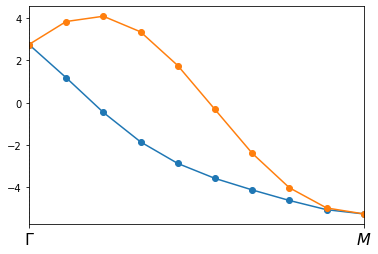

In [43]:
def BulkBands(model):
    #path=[[0.,0.,0.], [.5,0.,0.], [.5,.5,0.],  [0.,0.,0.], [.5,.5,.5] ]
    #label=['$\Gamma$', '$X$',     '$M$',  '$\Gamma$', '$R$' ]

    path=[[0, 0, 0], [.5, .5, 0] ]
    label=['$\Gamma$', '$M$' ]

    
    (k_vec,k_dist,k_node)=model.k_path(path,10, report=False);
    print (k_dist,'\n', k_vec)
    evals, evecs=model.solve_all(k_vec, eig_vectors=True)
    for j in range(evals.shape[0]):
        plt.plot(k_dist, evals[j], '-o')
    for n in range(len(k_node)):
        plt.axvline(x=k_node[n], lw=0.5, ls=':', color='k')
    plt.xticks(k_node, label, fontsize=16)
    plt.xlim(k_node[0], k_node[-1])
    
t = 1.
soc = 0.5
model = Hopf_model0(t, soc)
BulkBands(model)

In [ ]:
def WannierFlow(model, side=0):
    kappa_values= [0., 0.5]
    nk=51; dk=1./(nk-1.0)
    arr = wf_array(model, [nk, nk])
    
    for k0 in range(nk):
        for k1 in range(nk):
            kvec= [kappa_values[side], k0*dk, k1*dk ]
            evals, evecs = model.solve_one(kvec, eig_vectors=True)
            arr[k0, k1] = evecs
    arr.impose_pbc(mesh_dir=0,k_dir=0)
    arr.impose_pbc(mesh_dir=1,k_dir=1)
    hwfc=arr.berry_phase([0,1],dir=0,contin=True,berry_evals=True)/two_pi;

    kk=np.linspace(0.,1.,nk)
    for shift in [-1, 0, 1]:
        plt.plot(kk, hwfc[:,0]+shift, color='k')
        plt.plot(kk, hwfc[:,1]+shift, color='k')        
    plt.xlim([0, 1])

In [ ]:
def GetZ2Index(model, surf='x', side=0):
    kappa_values= [0., 0.5]
    nk=31; dk=1./(nk-1)
    arr = wf_array(model, [nk, nk])
    for k0 in range(nk):
        for k1 in range(nk):
            if surf =='x':
                kvec= [kappa_values[side], k0*dk, k1*dk]
            elif surf =='y':
                kvec= [k0*dk, kappa_values[side], k1*dk]
            elif surf =='z':
                kvec= [k0*dk, k1*dk, kappa_values[side]]
            evals, evecs = model.solve_one(kvec, eig_vectors=True)
            arr[k0, k1] = evecs
    arr.impose_pbc(mesh_dir=0,k_dir=0)
    arr.impose_pbc(mesh_dir=1,k_dir=1)
    hwfc=arr.berry_phase([0,1],dir=1,contin=True,berry_evals=True)/two_pi;

    kk=np.linspace(0.,1.,nk)
    for shift in [-1, 0, 1]:
        plt.plot(kk, hwfc[:]+shift, color='k')
    plt.xlim([0, 1])
    plt.xticks([0,.5, 1.])
    plt.yticks([])

In [ ]:
def SurfaceBands(model, cut_dir=1):
    width=20; nkr=51;
    rib_model = model.cut_piece(width, fin_dir=cut_dir, glue_edgs=False)    
    path=[ [0.0, 0.0], [0.5, 0.0], [0.5, 0.5] , [0.0,0.0], [0.0, 0.5]  ]
    label = [  '$[0,0]$', '$[\pi, 0]$', '$[\pi, \pi]$', '$[0, 0]$', '$[0, \pi]$'  ]
    (k_vec, k_dist, k_node) = rib_model.k_path(path,nkr,report=False)
    (rib_eval, rib_evec) = rib_model.solve_all(k_vec, eig_vectors=True)
    
    for i in range(2*width):
        plt.plot(k_dist, rib_eval[i,:], lw=1., color='blue')
        
    plt.plot(k_dist, rib_eval[width-1,:], lw=2., color='red')
    plt.plot(k_dist, rib_eval[width  ,:], lw=2., color='red')
    for n in range(len(k_node)):
        plt.axvline(x=k_node[n], lw=0.5, ls=':', color='k')
    
    plt.xticks(k_node, label, fontsize=14)
    plt.xlim(k_node[0], k_node[-1])


In [ ]:
def model1(delta, t):
    lat = [ [1., 0., 0.], [0., 1., 0.], [0., 0., 1.]  ]
    orb = [ [0., 0., 0.] ]
    dimk=3; dimr=3
    mymodel=tb_model(dimk, dimr, lat, orb, nspin=2)
    
    sx = np.array([0, 1, 0, 0] )
    sy = np.array([0, 0, 1, 0])
    sz = np.array([0, 0, 0, 1])
    
    mymodel.set_onsite([-delta*sz])
    mymodel.set_hop( t * ( sz + 1j*sx ), 0, 0, [1,0,0])
    mymodel.set_hop( t * ( sz + 1j*sy ), 0, 0, [0,1,0])
    mymodel.set_hop( t * ( sz + 1j*sz ), 0, 0, [0,0,1])
    return mymodel


t = -1.
pL=[0, 0.5, .75, 1.]
plt.figure(1, figsize=(18, 9))
for i, delta in enumerate(pL):
    model=model1(delta, t)
    plt.subplot(3, len(pL), 1+i)
    plt.title('$\delta$= %1.2f, t=%1.0f' % (delta, t))
    BulkBands(model)
    plt.subplot(3, len(pL), 1+i+len(pL))
    #WannierFlow(model, side=0)
    GetZ2Index(model, surf='z', side=1)
    plt.subplot(3, len(pL), 1+i+2*len(pL))
    SurfaceBands(model, cut_dir=0)

In [ ]:
import numpy as np
import pylab as plt 
from pythtb import tb_model
from pythtb import wf_array

two_pi=2*np.pi

def Hopf_model2(delta, t):
    lat = [ [1., 0., 0.], [0., 1., 0.], [0., 0., 1.]  ]
    orb = [ [0., 0., 0.] ]
    dimk=3; dimr=3
    mymodel=tb_model(dimk, dimr, lat, orb, nspin=2)
    
    sx = np.array([0, 1, 0, 0])
    sy = np.array([0, 0, 1, 0])
    sz = np.array([0, 0, 0, 1])
    
    mymodel.set_onsite([-delta*sz])
    mymodel.set_hop( t * ( sz + 1j*sx ), 0, 0, [1,0,0])
    mymodel.set_hop( t * ( sz + 1j*sy ), 0, 0, [0,1,0])
    mymodel.set_hop( t * ( sz + 1j*sz ), 0, 0, [0,0,1])
    return mymodel


t = -1.
pL=[0, 0.5, .75, 1.]
plt.figure(1, figsize=(18, 9))
for i, delta in enumerate(pL):
    model=Hopf_model1(delta, t)
    plt.subplot(3, len(pL), 1+i)
    plt.title('$\delta$= %1.2f, t=%1.0f' % (delta, t))
    BulkBands(model)
    plt.subplot(3, len(pL), 1+i+len(pL))
    SurfaceBands(model, cut_dir=0)
    plt.subplot(3, len(pL), 1+i+2*len(pL))
    WannierFlow(model, side=1)


In [ ]:
import numpy as np
import pylab as plt 
from pythtb import tb_model
from pythtb import wf_array

two_pi=2*np.pi

def Hopf_model3(delta, t):
    lat = [ [1., 0., 0.], [0., 1., 0.], [0., 0., 1.]  ]
    orb = [ [0., 0., 0.] ]
    dimk=3; dimr=3
    mymodel=tb_model(dimk, dimr, lat, orb, nspin=2)
    
    sx = np.array([0, 1, 0, 0])
    sy = np.array([0, 0, 1, 0])
    sz = np.array([0, 0, 0, 1])
    
    mymodel.set_onsite([ delta*sz])
    mymodel.set_hop( t * (    sx ), 0, 0, [1,0,0])
    mymodel.set_hop( t * ( 1j*sy ), 0, 0, [0,1,0])
    mymodel.set_hop( t * (    sz ), 0, 0, [0,0,1])
    return mymodel


t = -1.
pL=[-1., 0, 0.5, .75, 1., 2.]
plt.figure(1, figsize=(18, 9))
for i, delta in enumerate(pL):
    model=Hopf_model3(delta, t)
    plt.subplot(3, len(pL), 1+i)
    plt.title('$\delta$= %1.2f, t=%1.0f' % (delta, t))
    BulkBands(model)
    plt.subplot(3, len(pL), 1+i+len(pL))
    SurfaceBands(model, cut_dir=2)
    plt.subplot(3, len(pL), 1+i+2*len(pL))
    WannierFlow(model, side=1)


In [6]:
hh = np.zeros((1,2,1,2), dtype=float)

In [16]:
hh[0,0] = [1,1]
hh[1,1] = [2,2]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [23]:
hh = [1,2,3,4]

In [25]:
hh = np.zeros((1,2,1,2), dtype=float)

In [30]:
hh[:] = np.array([1,2,3,4]).reshape([1,2,1,2])

In [31]:
hh

array([[[[1., 2.]],

        [[3., 4.]]]])